## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [367]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [368]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [369]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,7
2,2008-08-01 00:00:00,c,78
3,2008-08-01 00:00:00,c#,492
4,2008-08-01 00:00:00,c++,157


In [370]:
df.tail()

,DATE,TAG,POSTS
2713,2024-11-01 00:00:00,php,543
2714,2024-11-01 00:00:00,python,3189
2715,2024-11-01 00:00:00,r,703
2716,2024-11-01 00:00:00,ruby,75
2717,2024-11-01 00:00:00,swift,398


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [371]:
df.shape

(2718, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [372]:
df.count()

DATE     2718
TAG      2718
POSTS    2718
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [373]:
highest_posts_all_time = df.groupby('TAG').sum('POSTS').sort_values('POSTS',ascending = False)
highest_posts_all_time

,POSTS
TAG,
javascript,2461143
python,2157358
java,1872549
c#,1583574
php,1425363
c++,789999
r,502704
c,393388
swift,326900


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [374]:
df.groupby("TAG").count().sort_values("DATE",ascending = False)

,DATE,POSTS
TAG,,
c#,197,197
assembly,196,196
c,196,196
c++,196,196
delphi,196,196
java,196,196
python,196,196
javascript,196,196
perl,196,196


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [375]:
# df['DATE']
type(df.DATE[1])

str

In [376]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [377]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,7
2,2008-08-01,c,78
3,2008-08-01,c#,492
4,2008-08-01,c++,157


## Data Manipulation



In [378]:
reshaped_df = df.pivot_table(index='DATE',columns='TAG',values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,7.0,78.0,492.0,157.0,11.0,NaN,214.0,158.0,26.0,154.0,116.0,NaN,66.0,NaN
2008-09-01,26.0,292.0,1525.0,699.0,93.0,NaN,1032.0,579.0,120.0,411.0,507.0,3.0,274.0,NaN
2008-10-01,15.0,267.0,1816.0,743.0,101.0,NaN,1053.0,661.0,109.0,513.0,480.0,NaN,234.0,NaN
2008-11-01,13.0,221.0,1510.0,658.0,129.0,NaN,856.0,488.0,79.0,417.0,417.0,1.0,143.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,90.0,555.0,2073.0,1112.0,52.0,249.0,1524.0,2857.0,34.0,859.0,5195.0,1051.0,93.0,568.0
2024-08-01,112.0,479.0,1815.0,1011.0,83.0,208.0,1194.0,2448.0,37.0,786.0,4458.0,877.0,103.0,537.0
2024-09-01,86.0,444.0,1557.0,980.0,67.0,153.0,1269.0,2158.0,26.0,601.0,3681.0,744.0,82.0,504.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [379]:
reshaped_df.shape

(197, 14)

In [380]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [381]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,7.0,78.0,492.0,157.0,11.0,NaN,214.0,158.0,26.0,154.0,116.0,NaN,66.0,NaN
2008-09-01,26.0,292.0,1525.0,699.0,93.0,NaN,1032.0,579.0,120.0,411.0,507.0,3.0,274.0,NaN
2008-10-01,15.0,267.0,1816.0,743.0,101.0,NaN,1053.0,661.0,109.0,513.0,480.0,NaN,234.0,NaN
2008-11-01,13.0,221.0,1510.0,658.0,129.0,NaN,856.0,488.0,79.0,417.0,417.0,1.0,143.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [382]:
reshaped_df.count()

TAG
assembly      196
c             196
c#            197
c++           196
delphi        196
go            181
java          196
javascript    196
perl          196
php           196
python        196
r             194
ruby          196
swift         186
dtype: int64

In [383]:
reshaped_df.fillna(0,inplace=True)

In [384]:
reshaped_df.isna().values.any()


np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

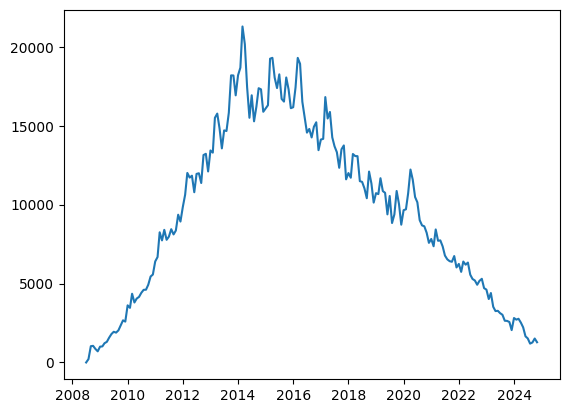

In [385]:
plt.plot(reshaped_df.index, reshaped_df['java'])

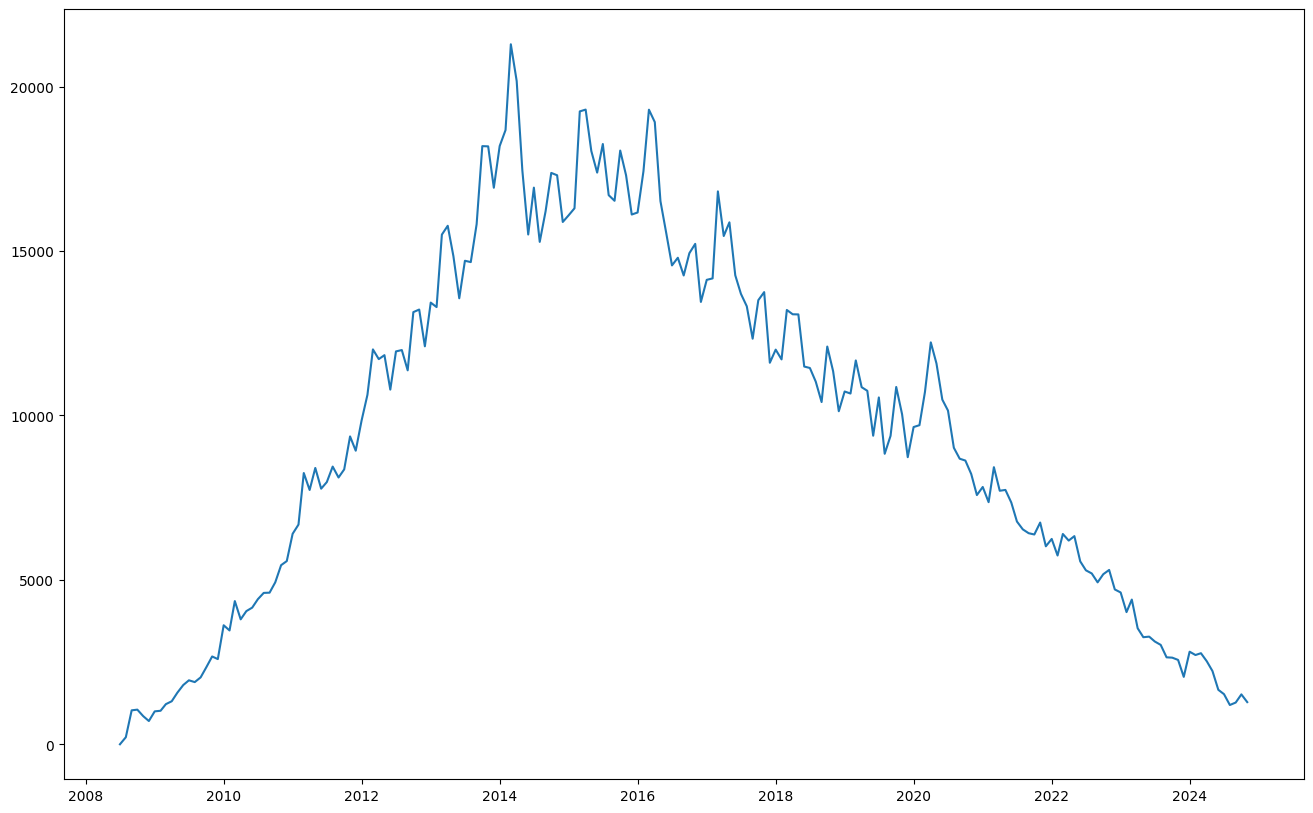

In [386]:
plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)

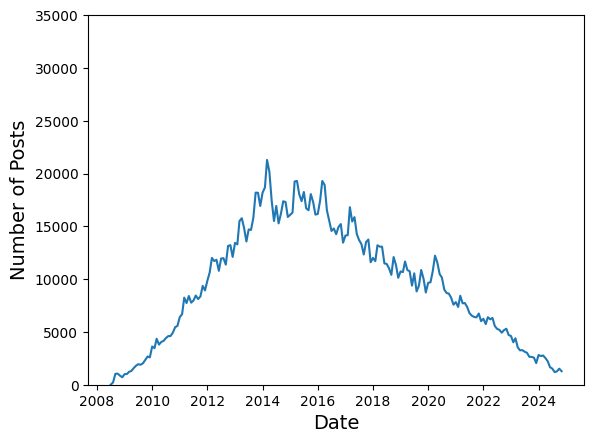

In [387]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

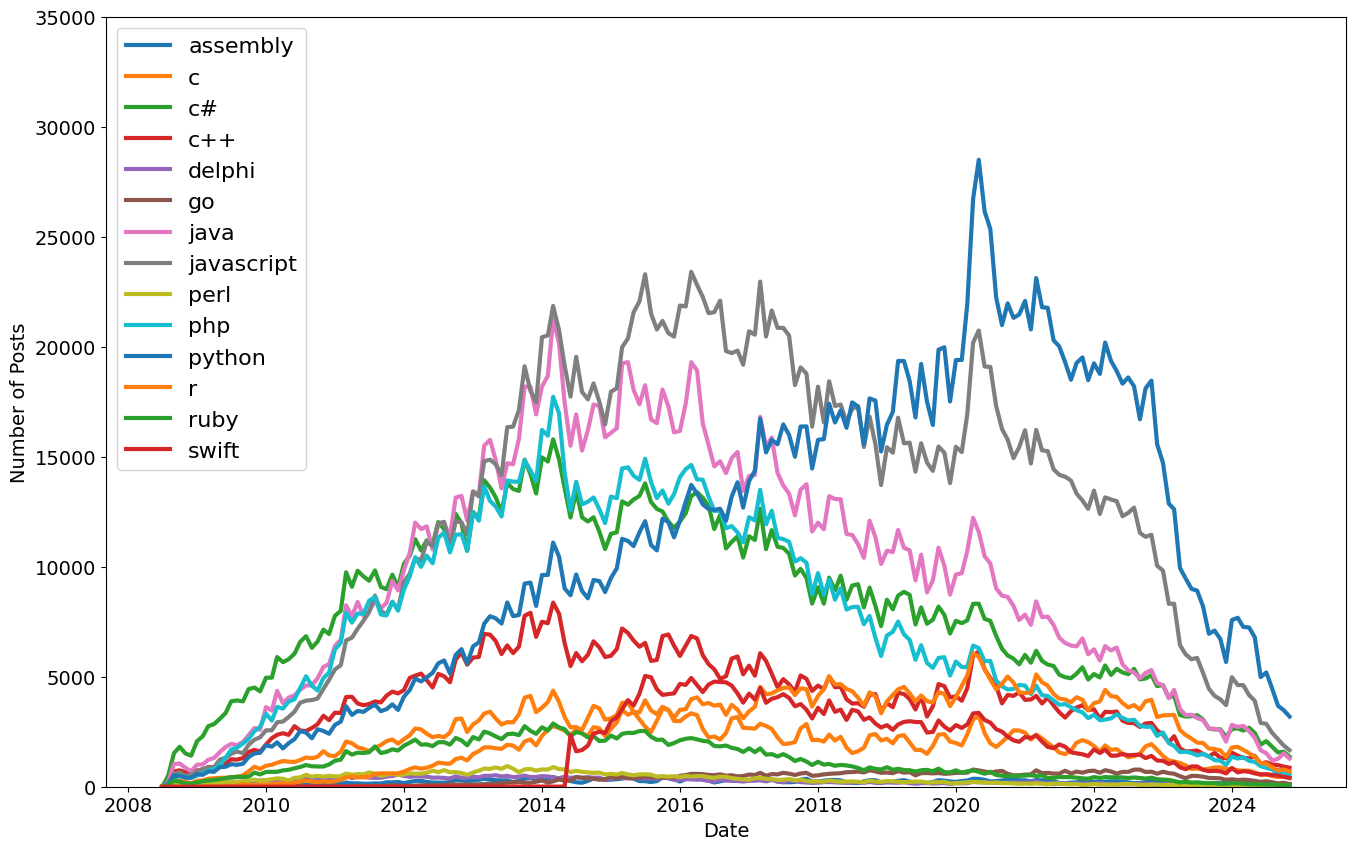

In [393]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
# start_date = datetime.datetime(2010, 1, 1)
# end_date = datetime.datetime(2020, 1, 1)
# plt.xlim(start_date, end_date)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

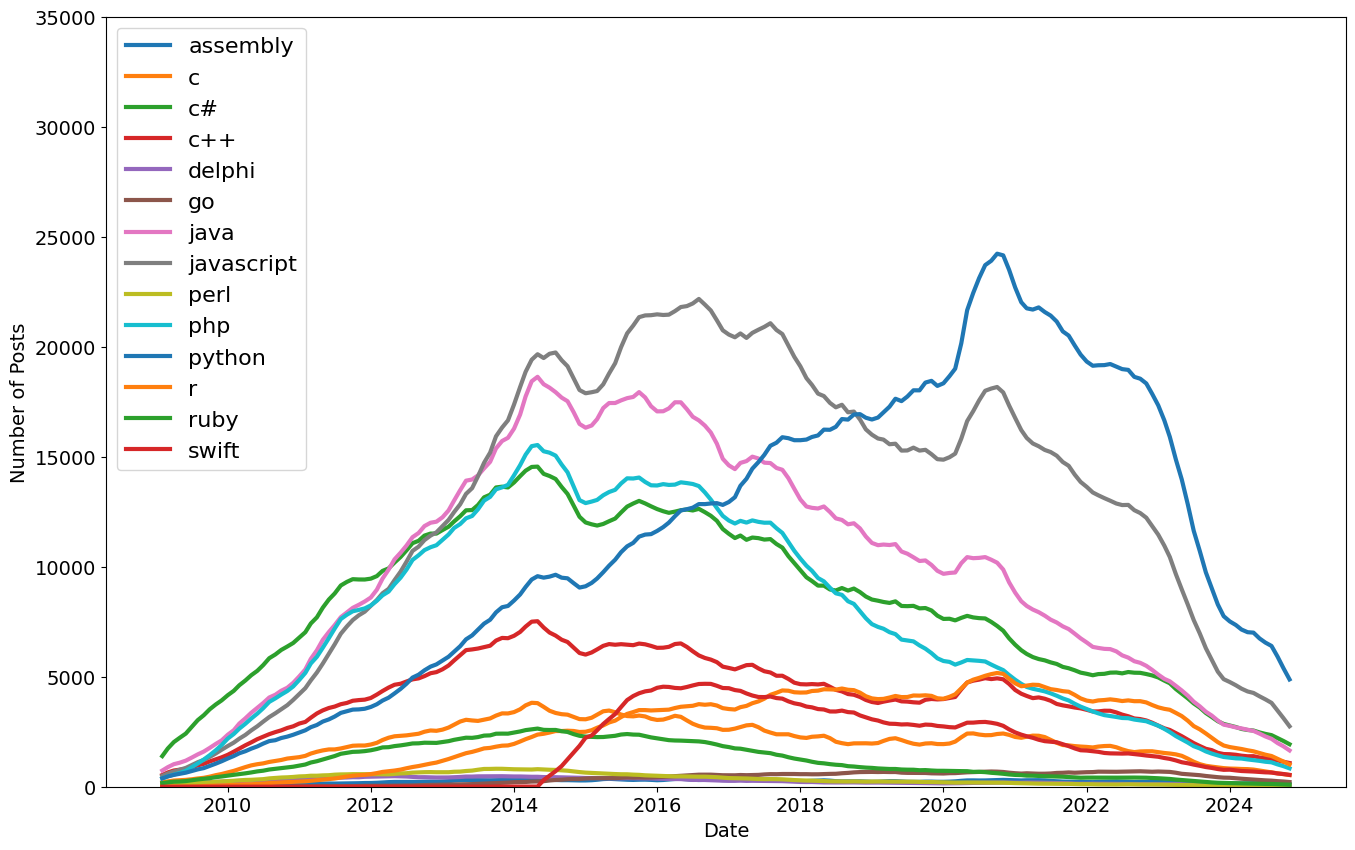

In [405]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=8).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)